In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input
import pathlib

In [3]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)  # Use Path instead of path
image_count = len(list(data_dir.glob('*/*.jpg')))

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


/root/.keras/datasets/flower_photos/roses/4231745228_ece86330d9.jpg


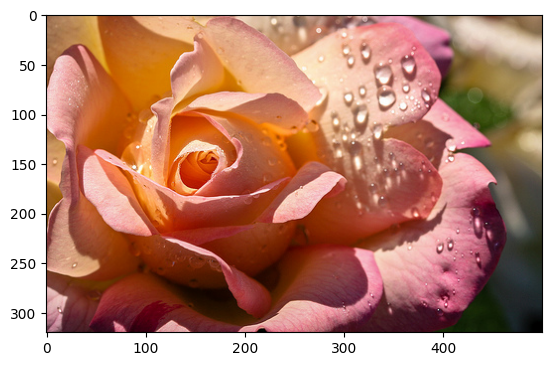

In [4]:
roses = list(data_dir.glob('roses/*'))
print(roses[1])
img = plt.imread(str(roses[0]))  # Use plt.imread to read the image
plt.imshow(img)
plt.show()


In [ ]:
img_height, img_width = 224, 224
batch_size = 16

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
def preprocess_image(image, label):
    image = preprocess_input(image)  # Apply VGG16-specific preprocessing
    return image, label

train_ds = train_ds.map(preprocess_image)
val_ds = val_ds.map(preprocess_image)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
base_model.trainable = False


In [ ]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')  # Output layer for categorical labels
])

In [ ]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',  # Use categorical crossentropy
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 50s 213ms/step - accuracy: 0.6618 - loss: 5.6111 - val_accuracy: 0.8134 - val_loss: 0.6083
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9009 - loss: 0.3074 - val_accuracy: 0.8215 - val_loss: 0.6734
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.9389 - loss: 0.2084 - val_accuracy: 0.8243 - val_loss: 0.8084
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9584 - loss: 0.1583 - val_accuracy: 0.8188 - val_loss: 0.8975
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.9716 - loss: 0.1069 - val_accuracy: 0.8351 - val_loss: 1.0219
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.9664 - loss: 0.1170 - val_accuracy: 0.8406 - val_loss: 0.9078
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9875 - loss: 0.0495 - val_accuracy: 0.8460 - val_loss: 1.2673
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9774 - loss: 0.0906 -

In [ ]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(val_ds)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8597 - loss: 1.4003
Validation Loss: 1.442597508430481
Validation Accuracy: 0.8446866273880005


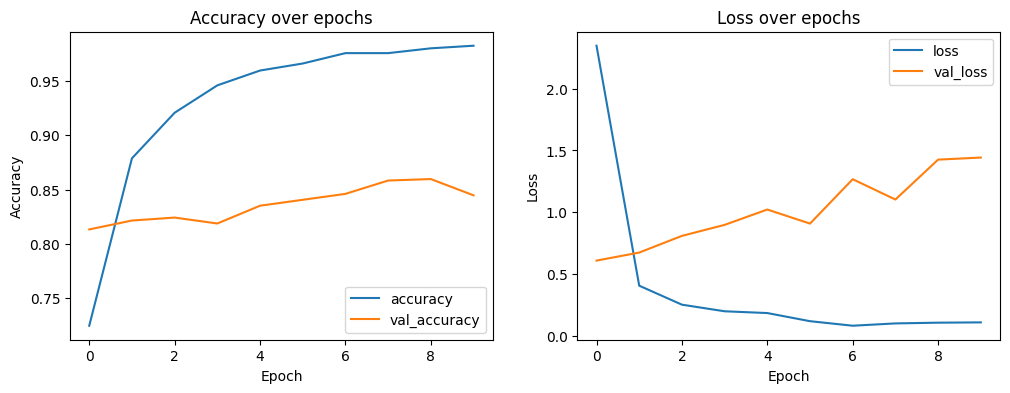

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy over epochs')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss over epochs')

plt.show()
